# Unsupervised Learning and Preprocessing


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
import numpy as np
cancer = load_breast_cancer()

In [2]:
def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None,
                     labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    """Adaption of matplotlib.pyplot.scatter to plot classes or clusters.

    Parameters
    ----------

    x1 : nd-array
        input data, first axis

    x2 : nd-array
        input data, second axis

    y : nd-array
        input data, discrete labels

    cmap : colormap
        Colormap to use.

    markers : list of string
        List of markers to use, or None (which defaults to 'o').

    s : int or float
        Size of the marker

    padding : float
        Fraction of the dataset range to use for padding the axes.

    alpha : float
        Alpha value for all points.
    """
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unique_y = np.unique(y)

    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(markers) == 1:
        markers = markers * len(unique_y)

    if labels is None:
        labels = unique_y

    # lines in the matplotlib sense, not actual lines
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        # if c is none, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # use light edge for dark markers
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"

        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color,
                             markeredgewidth=markeredgewidth,
                             markeredgecolor=markeredgecolor)[0])

    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lines

### Dimensionality Reduction, Feature Extraction and Manifold Learning
#### Principal Component Analysis (PCA)

Una de las aplicaciones más comunes de PCA es la visualización de conjuntos de datos de alta dimensión.

Es difícil crear gráficos de dispersión de datos que tengan más de dos características. Pero si queremos ver el conjunto de datos del cáncer de mama, incluso el uso de una gráfica de pares es complicado. 


El conjunto de datos de cáncer de mama tiene 30 características, lo que resultaría en 30 * 29 / 2 = 435 gráficos de dispersión (solo para el triángulo superior). Nunca podríamos ver todas estas tramas en detalle, y mucho menos tratar de entenderlas.

Sin embargo, hay una visualización aún más simple que podemos usar: calcular histogramas de cada una de las características para las dos clases, cáncer benigno y maligno


## Aplicación de PCA al conjunto de datos de cáncer para la visualización

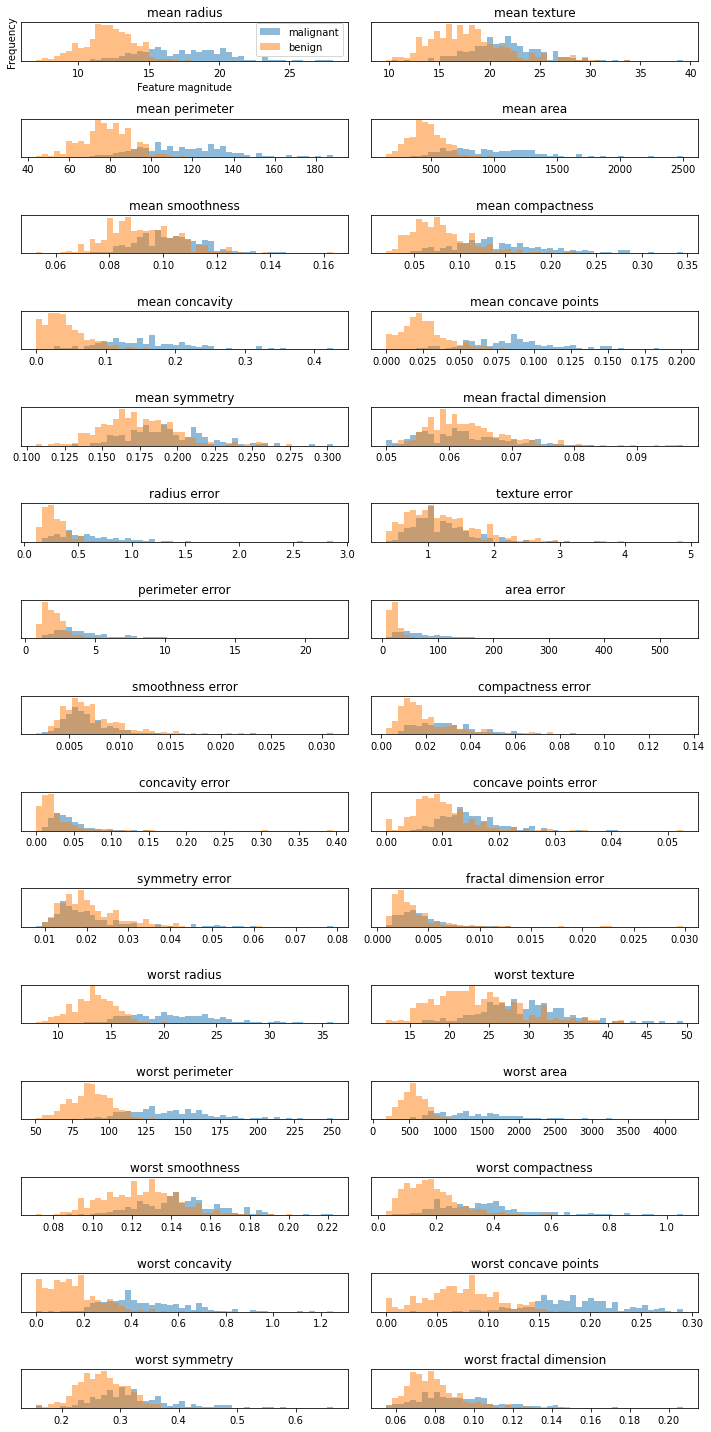

In [3]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Aquí creamos un histograma para cada una de las características, contando la frecuencia con la que aparece un punto de datos con una característica en un cierto rango (llamado bin). 

Cada gráfica superpone dos histogramas, uno para todos los puntos de la clase benigna y otro para todos los puntos de la clase maligna. 

Esto nos da una idea de cómo se distribuye cada característica en las dos clases, y nos permite aventurar una suposición sobre qué características son mejores para distinguir muestras malignas y benignas. 

Por ejemplo, la característica "error de suavidad" parece bastante poco informativa, porque los dos histogramas se superponen en su mayoría, mientras que la característica "peores puntos cóncavos" parece bastante informativa, porque los histogramas son bastante inconexos.


Sin embargo, esta gráfica no nos muestra nada sobre las interacciones entre las variables y cómo estas se relacionan con las clases. Usando PCA, podemos capturar las interacciones principales y obtener una imagen un poco más completa. Podemos encontrar los dos primeros componentes principales, y visualizar los datos en este nuevo espacio bidimensional con un único diagrama de dispersión.

Antes de aplicar PCA, escalamos nuestros datos para que cada característica tenga una varianza unitaria utilizando StandardScaler:



In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

Aprender la transformación PCA y aplicarla es tan simple como aplicar una transformación de preprocesamiento. 

Creamos instancias del  objeto PCA, encontramos los componentes principales llamando al  método de ajuste y, a continuación, aplicamos la reducción de rotación y dimensionalidad llamando a la transformada. 

De forma predeterminada, PCA solo gira (y desplaza) los datos, pero mantiene todos los componentes principales. 

Para reducir la dimensionalidad de los datos, debemos especificar cuántos componentes queremos conservar al crear el  objeto PCA:


In [5]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

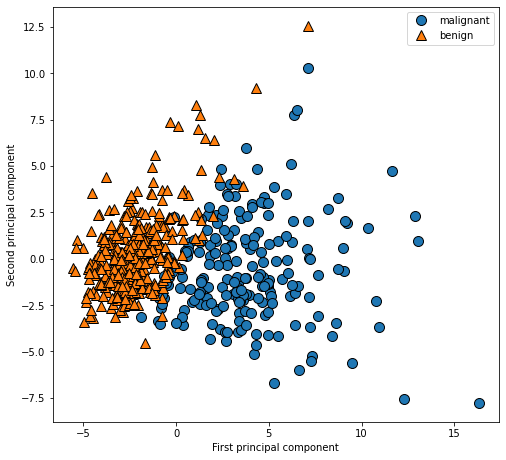

In [6]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Es importante tener en cuenta que PCA es un método no supervisado y no utiliza ninguna información de clase al encontrar la rotación. 

Simplemente mira las correlaciones en los datos. Para el gráfico de dispersión que se muestra aquí, trazamos el primer componente principal contra el segundo componente principal y, a continuación, utilizamos la información de la clase para colorear los puntos. 

Puedes ver que las dos clases se separan bastante bien en este espacio bidimensional. Esto nos lleva a creer que incluso un clasificador lineal podría hacer un trabajo razonablemente bueno al distinguir las dos clases. También podemos ver que los puntos malignos están más extendidos que los puntos benignos, algo que ya pudimos ver un poco en los histogramas.

Una desventaja de PCA es que los dos ejes en la trama a menudo no son muy fáciles de interpretar. Los componentes principales corresponden a direcciones en los datos originales, por lo que son combinaciones de las características originales. Sin embargo, estas combinaciones suelen ser muy complejas, como veremos en breve. Los componentes principales se almacenan en el  atributo components_ del  objeto PCA durante la conexión:


In [7]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


Cada fila de components_ corresponde a un componente principal, y se ordenan por su importancia (el primer componente principal es lo primero, etc.). 

Las columnas corresponden al atributo de características original del PCA en este ejemplo, "radio medio", "textura media", etc. Echemos un vistazo al contenido de components_:

In [8]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


También podemos visualizar los coeficientes utilizando un mapa de calor, que podría ser más fácil de entender:

Text(0, 0.5, 'Principal components')

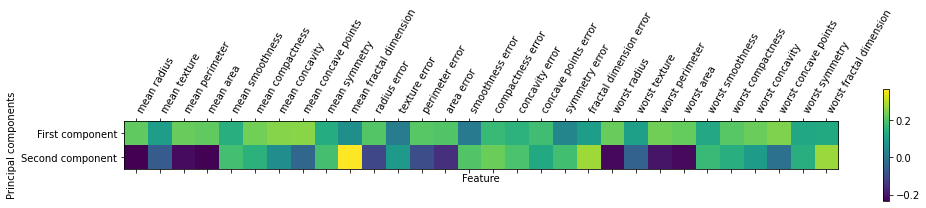

In [9]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Puede ver que en el primer componente, todas las características tienen el mismo signo (es positivo, pero como mencionamos anteriormente, no importa en qué dirección apunte la flecha). 

Eso significa que existe una correlación general entre todas las características. Como una medición es alta, es probable que las otras también sean altas. El segundo componente tiene signos mixtos, y ambos componentes involucran las 30 características. 

